# Make data by hand and get the analysis done quick!

In [1]:
import pandas as pd

In [2]:
MAIN_DE = "input/Sierra'sDE-InitialResultAnnotatedGeneSymbol.xlsx"
DSigDB = "input/EnrichrResultsSierra'sTopUpregulatedGenes-DSigDB-Drugs-ENCODECHEA-TranscriptionFactors.xlsx"

dframe_mainde = pd.read_excel(MAIN_DE)
dframe_sig = pd.read_excel(DSigDB)

display(dframe_mainde.head(),
        dframe_sig.head()
       )

,GeneID,logFC,logCPM,F,PValue,FDR,Gene Symbol,Unnamed: 7,Unnamed: 8,Unnamed: 9,5337
0,5337,7.730171,3.670278,12.958127,0.001713,1,PLD1,NaN,NaN,NaN,NaN
1,340348,-8.125616,4.072203,14.069936,0.001883,1,TSPAN33,NaN,NaN,NaN,NaN
2,23394,2.878191,4.771266,10.282602,0.003560,1,ADNP,NaN,NaN,NaN,NaN
3,146434,7.346030,3.341787,10.349140,0.003722,1,ZNF597,NaN,NaN,NaN,NaN
4,55832,-0.778189,7.762736,9.292128,0.005253,1,CAND1,NaN,NaN,NaN,NaN


,Term (yellow = significant),Overlap,Adjusted P-value,"""-Log10 Adjusted P-value""",Odds Ratio,Combined Score,Genes
0,ETHYL METHANESULFONATE CTD 00005938,53/2315,0.007077,2.150171,2.101544,25.032531,CYFIP2;SLC44A5;TTC23;ITGAM;HNF4G;TNC;SYNE2;OPA...
1,VALPROIC ACID CTD 00006977,137/8312,0.007077,2.150171,1.747857,20.377258,CYFIP2;CTNND2;PITPNA;ZFAND5;TNC;PLB1;ZDBF2;RPL...
2,benzo[a]pyrene CTD 00005488,83/4424,0.013085,1.883221,1.785810,18.997953,CYFIP2;SLC44A5;TNFAIP8;CTNND2;ZFAND5;HNF4G;TNC...
3,cyclosporin A CTD 00007121,86/4825,0.039470,1.403728,1.681761,15.322645,CYFIP2;PIGS;SLC44A5;PYGB;TNFAIP8;POGLUT1;ZFAND...
4,METHYL METHANESULFONATE CTD 00006307,72/3864,0.039470,1.403728,1.721807,15.326002,CYFIP2;SLC44A5;ITGAM;HEXA;ZFAND5;HNF4G;KIF14;T...


In [3]:
EXTERNAL_DE = "test/data/10494_GSE79492_diffExpAnalysis_164560/resultset_ID494251.data.txt"
dframe_extde = pd.read_table(EXTERNAL_DE, comment="#")
dframe_extde.head()

,Element_Name,Gene_Symbol,Gene_Name,NCBI_ID,FoldChange_ridaforolimus,Tstat_ridaforolimus,PValue_ridaforolimus,FoldChange_ridaforolimus_dalotuzumab,Tstat_ridaforolimus_dalotuzumab,PValue_ridaforolimus_dalotuzumab,FoldChange_dalotuzumab,Tstat_dalotuzumab,PValue_dalotuzumab
0,3663,IRF5,interferon regulatory factor 5,3663,0.3537,1.491,0.14380,0.5826,2.0470,0.047310,0.9873,2.7410,0.009114
1,115265,DDIT4L,DNA damage inducible transcript 4 like,115265,-0.6706,-1.201,0.23690,-2.3750,-3.4300,0.001412,-2.7060,-2.7800,0.008242
2,2152,F3,"coagulation factor III, tissue factor",2152,-0.9636,-1.467,0.15010,-0.3655,-0.4707,0.640400,-0.3609,-0.3512,0.727300
3,11100,HNRNPUL1,heterogeneous nuclear ribonucleoprotein U like 1,11100,-0.2257,-1.502,0.14100,-0.1063,-0.5914,0.557600,-0.2905,-1.2260,0.227300
4,10742,RAI2,retinoic acid induced 2,10742,0.6567,1.844,0.07261,1.2260,3.0370,0.004196,-1.9580,-2.8160,0.007517


In [5]:
dframe_sig_exp = pd.merge(dframe_sig["Genes"].apply(
                    lambda x : x.split(";")).explode(),
         dframe_sig)

dframe_sig_exp = dframe_sig_exp.sort_values("Odds Ratio", ascending=False).reset_index()
IDX_KEEP = dframe_sig_exp.groupby("Genes")["Odds Ratio"].idxmax()
dframe_sig_exp = dframe_sig_exp.iloc[IDX_KEEP,:]
dframe_sig_exp.head()

,index,Genes,Term (yellow = significant),Overlap,Adjusted P-value,"""-Log10 Adjusted P-value""",Odds Ratio,Combined Score
3849,86228,ACP1,cefdinir CTD 00002394,1/14,0.679300,0.167939,6.147306,11.252913
40046,53987,AFAP1L2,4-tert-Octylphenol CTD 00003436,1/46,0.715841,0.145183,1.773009,1.467417
9628,55351,AKAP12,"16,16-dimethylprostaglandin E2 PC3 UP",1/20,0.679300,0.167939,4.204773,6.348606
38721,62979,AKAP13,Org-2058 CTD 00000993,1/45,0.712451,0.147245,1.813397,1.530475
10609,53240,ANKRD11,mycophenolic acid MCF7 DOWN,1/20,0.679300,0.167939,4.204773,6.348606


In [24]:
dframe_analysis = dframe_mainde.query("PValue <= 0.05")
dframe_analysis = pd.merge(dframe_analysis, dframe_sig_exp, 
                           left_on = "Gene Symbol", right_on = "Genes",
                           how="left"
                          )
dframe_analysis = pd.merge(dframe_analysis, dframe_extde[["Gene_Symbol", "Tstat_ridaforolimus", "Tstat_dalotuzumab"]],
                           left_on = "Gene Symbol", right_on = "Gene_Symbol",
                           how = "left"
                          )

In [25]:
dframe_mca = dframe_analysis[["Gene Symbol", "logFC", "Term (yellow = significant)", "Tstat_ridaforolimus", "Tstat_dalotuzumab"]].copy()
dframe_mca["logFC"] = dframe_mca["logFC"].apply(lambda x : "UP" if float(x) > 0 else "DOWN")
dframe_mca["Tstat_ridaforolimus"] = dframe_mca["Tstat_ridaforolimus"].apply(lambda x : "UP" if float(x) > 0 else "DOWN")
dframe_mca["Tstat_dalotuzumab"] = dframe_mca["Tstat_dalotuzumab"].apply(lambda x : "UP" if float(x) > 0 else "DOWN")
dframe_mca = dframe_mca.fillna("EMPTY")
dframe_mca.columns = "Gene,DE,DrugTerm,TreatRidaforolimus,TreatDalotuzumab".split(",")
dframe_mca.head()

,Gene,DE,DrugTerm,TreatRidaforolimus,TreatDalotuzumab
0,PLD1,UP,tamoxifen TTD 00011319,DOWN,UP
1,TSPAN33,DOWN,malathion BOSS,UP,UP
2,ADNP,UP,EMPTY,DOWN,DOWN
3,ZNF597,UP,EMPTY,DOWN,DOWN
4,CAND1,DOWN,indometacin PC3 UP,DOWN,DOWN


In [26]:
dframe_mca.to_csv("input/mvp-mca.tsv", sep="\t", index=False)

In [27]:
import corresponder
import utils
import plotnine as p9

MCA_ANALYSIS_OBJ = utils.calculate_mca(dframe_mca)
dframe_coords = utils.mca_to_coordinates(dframe_mca,
                                         MCA_ANALYSIS_OBJ
)
dframe_coords.head()

,Factor,x,y,AssociationType,Value
0,Gene_AACS,-0.880549,-0.461532,Gene,AACS
1,Gene_ABHD1,-1.068109,0.261475,Gene,ABHD1
2,Gene_ABITRAM,0.526825,-0.211068,Gene,ABITRAM
3,Gene_ACER3,0.366470,0.465616,Gene,ACER3
4,Gene_ACP1,0.104103,0.438200,Gene,ACP1


In [34]:
SHAPE = dframe_coords.Factor.apply(lambda x : x.split("_")[-1])
SHAPE = ["Term" if x not in ["UP", "DOWN"] else x for x in SHAPE]
dframe_coords["Directional?"] = SHAPE

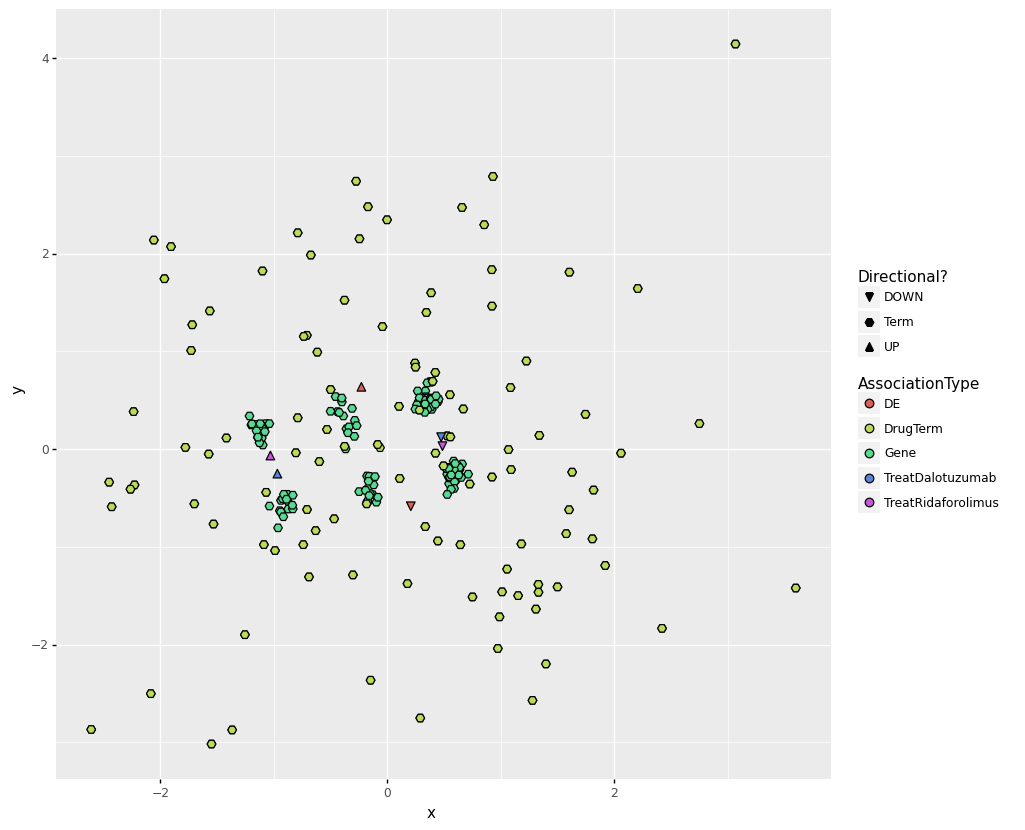

<ggplot: (8779677094723)>

In [43]:
p9.options.figure_size = 10,10
gg = (p9.ggplot(dframe_coords) +
    p9.aes(x='x', y='y', shape="Directional?",
           fill="AssociationType") +
           p9.geom_jitter(size=3) + p9.scale_shape_manual(['v','H', '^'])
    )
display(gg)

In [45]:
dframe_coords.to_excel("output/MVP_MCA_results.xlsx")